# Stock Market Prediction And Forecasting Using Stacked LSTM

## Keras and Tensorflow >2.0

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [6]:
### Data Collection
import pandas as pd
df = pd.read_csv("SBIN.csv")

In [7]:
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,SBIN,EQ,225.60,236.00,243.65,234.25,243.65,243.65,240.83,2373228,5.715338e+13,NaN,NaN,NaN
1,2000-01-04,SBIN,EQ,243.65,243.65,262.00,238.85,258.00,259.10,251.46,4495741,1.130506e+14,NaN,NaN,NaN
2,2000-01-05,SBIN,EQ,259.10,249.00,264.70,245.00,249.05,248.45,252.35,3434058,8.666008e+13,NaN,NaN,NaN
3,2000-01-06,SBIN,EQ,248.45,252.00,268.00,252.00,260.50,261.00,262.18,6658801,1.745817e+14,NaN,NaN,NaN
4,2000-01-07,SBIN,EQ,261.00,261.50,279.90,255.00,279.00,273.30,269.02,7873985,2.118287e+14,NaN,NaN,NaN


In [8]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5136,2020-08-25,SBIN,EQ,201.45,204.00,208.45,202.70,208.25,207.95,206.34,105397006,2.174813e+15,475915.0,24003422.0,0.2277
5137,2020-08-26,SBIN,EQ,207.95,208.50,210.35,206.15,209.90,209.85,208.62,66750983,1.392576e+15,304925.0,14858804.0,0.2226
5138,2020-08-27,SBIN,EQ,209.85,210.50,216.50,210.50,216.00,215.65,214.22,80999489,1.735175e+15,450426.0,20980013.0,0.2590
5139,2020-08-28,SBIN,EQ,215.65,217.00,225.90,216.80,225.40,224.85,222.03,95983850,2.131162e+15,420611.0,19675199.0,0.2050
5140,2020-08-31,SBIN,EQ,224.85,231.55,231.55,210.35,211.90,212.00,219.31,119990567,2.631552e+15,562903.0,24560366.0,0.2047


In [9]:
df1=df.reset_index()['Close']

In [10]:
df1

0       243.65
1       259.10
2       248.45
3       261.00
4       273.30
         ...  
5136    207.95
5137    209.85
5138    215.65
5139    224.85
5140    212.00
Name: Close, Length: 5141, dtype: float64

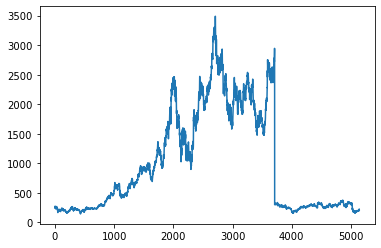

In [12]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [13]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [14]:
import numpy as np

In [15]:
df1

0       243.65
1       259.10
2       248.45
3       261.00
4       273.30
         ...  
5136    207.95
5137    209.85
5138    215.65
5139    224.85
5140    212.00
Name: Close, Length: 5141, dtype: float64

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [17]:
print(df1)

[[0.03052113]
 [0.03513514]
 [0.03195461]
 ...
 [0.02215918]
 [0.02490667]
 [0.02106914]]


In [18]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.75)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [19]:
training_size,test_size

(3855, 1286)

In [20]:
train_data

array([[0.03052113],
       [0.03513514],
       [0.03195461],
       ...,
       [0.03379125],
       [0.03394057],
       [0.03483649]])

In [21]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [22]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [23]:
print(X_train.shape), print(y_train.shape)

(3754, 100)
(3754,)


(None, None)

In [24]:

print(X_test.shape), print(ytest.shape)

(1185, 100)
(1185,)


(None, None)

In [25]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [26]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
59/59 [==============================] - 32s 312ms/step - loss: 0.0394 - val_loss: 9.0421e-05
Epoch 2/100
59/59 [==============================] - 11s 192ms/step - loss: 0.0016 - val_loss: 4.0886e-05
Epoch 3/100
59/59 [==============================] - 13s 225ms/step - loss: 0.0024 - val_loss: 2.7128e-05
Epoch 4/100
59/59 [==============================] - 13s 222ms/step - loss: 0.0015 - val_loss: 2.4291e-05
Epoch 5/100
59/59 [==============================] - 19s 323ms/step - loss: 0.0014 - val_loss: 2.2630e-05
Epoch 6/100
59/59 [==============================] - 14s 242ms/step - loss: 0.0016 - val_loss: 5.3471e-05
Epoch 7/100
59/59 [==============================] - 14s 240ms/step - loss: 0.0016 - val_loss: 2.1331e-05
Epoch 8/100
59/59 [==============================] - 15s 261ms/step - loss: 0.0012 - val_loss: 1.8139e-05
Epoch 9/100
59/59 [==============================] - 15s 262ms/step - loss: 8.7515e-04 - val_loss: 2.2187e-05
Epoch 10/100
59/59 [======================

59/59 [==============================] - 12s 208ms/step - loss: 8.4334e-04 - val_loss: 8.1596e-06
Epoch 76/100
59/59 [==============================] - 13s 228ms/step - loss: 2.8671e-04 - val_loss: 1.3546e-05
Epoch 77/100
59/59 [==============================] - 13s 215ms/step - loss: 1.8451e-04 - val_loss: 2.3853e-05
Epoch 78/100
59/59 [==============================] - 12s 208ms/step - loss: 1.4921e-04 - val_loss: 1.3621e-04
Epoch 79/100
59/59 [==============================] - 12s 210ms/step - loss: 2.7778e-04 - val_loss: 8.2187e-06
Epoch 80/100
59/59 [==============================] - 12s 195ms/step - loss: 4.6067e-04 - val_loss: 6.8601e-06
Epoch 81/100
59/59 [==============================] - 13s 217ms/step - loss: 2.2367e-04 - val_loss: 6.0215e-06
Epoch 82/100
59/59 [==============================] - 13s 222ms/step - loss: 1.4257e-04 - val_loss: 6.6809e-06
Epoch 83/100
59/59 [==============================] - 12s 199ms/step - loss: 1.7047e-04 - val_loss: 2.7276e-05: 5s - loss: 1.

In [44]:
import tensorflow as tf

In [45]:
tf.__version__

'2.4.1'

In [46]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [47]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [48]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1537.1234025110791

In [49]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

276.20301086340226

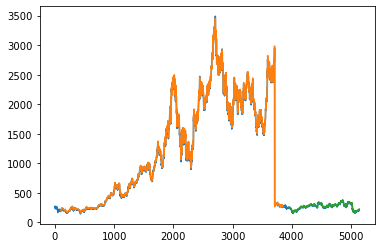

In [50]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [51]:
len(test_data)

1286

In [52]:
x_input=test_data[1186:].reshape(1,-1)
x_input.shape

(1, 100)

In [53]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [54]:
temp_input

[0.012408541137822908,
 0.013827086755263555,
 0.012557861729132452,
 0.012214424369120506,
 0.014051067642227869,
 0.015469613259668509,
 0.015245632372704203,
 0.012931163207406303,
 0.014110795878751678,
 0.013513513513513514,
 0.011437957294310887,
 0.01178139465432284,
 0.012796774675227725,
 0.0145288935344184,
 0.014648350007466032,
 0.011169180229953717,
 0.008645662236822463,
 0.008854711064655817,
 0.008750186650739143,
 0.007525757802000904,
 0.007167388382857999,
 0.007600418097655673,
 0.009750634612513069,
 0.007913991339405707,
 0.0074510975063461285,
 0.00413618037927431,
 0.0033895774227266015,
 0.0035687621322980506,
 0.0031357324175003767,
 0.0028072271166193832,
 0.002971479767059887,
 0.005121696281917276,
 0.0050022398088696435,
 0.005928027474988808,
 0.00854113782290579,
 0.008600866059429599,
 0.009989547558608342,
 0.009735702553382117,
 0.013842018814394515,
 0.013543377631775433,
 0.012841570852620575,
 0.013812154696132596,
 0.010661490219501274,
 0.0112587

In [55]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.02490279]
101
1 day input [0.01382709 0.01255786 0.01221442 0.01405107 0.01546961 0.01524563
 0.01293116 0.0141108  0.01351351 0.01143796 0.01178139 0.01279677
 0.01452889 0.01464835 0.01116918 0.00864566 0.00885471 0.00875019
 0.00752576 0.00716739 0.00760042 0.00975063 0.00791399 0.0074511
 0.00413618 0.00338958 0.00356876 0.00313573 0.00280723 0.00297148
 0.0051217  0.00500224 0.00592803 0.00854114 0.00860087 0.00998955
 0.0097357  0.01384202 0.01354338 0.01284157 0.01381215 0.01066149
 0.01125877 0.00963118 0.00939227 0.0094072  0.01140809 0.0128565
 0.01381215 0.0152307  0.01288637 0.01308048 0.01288637 0.01128864
 0.01104972 0.0129461  0.01314021 0.01291623 0.01391668 0.01408093
 0.01506645 0.01721666 0.01617142 0.01530536 0.0133194  0.01264745
 0.01337912 0.01396148 0.01472301 0.01581305 0.01509631 0.01696282
 0.01508138 0.0136479  0.01433478 0.0148574  0.01346872 0.01493206
 0.01517097 0.01497686 0.01493206 0.01478274 0.01469315 0.01563387
 0.01600717 0.01847096 0.01805286 0

9 day output [[0.03347014]]
10 day input [0.01143796 0.01178139 0.01279677 0.01452889 0.01464835 0.01116918
 0.00864566 0.00885471 0.00875019 0.00752576 0.00716739 0.00760042
 0.00975063 0.00791399 0.0074511  0.00413618 0.00338958 0.00356876
 0.00313573 0.00280723 0.00297148 0.0051217  0.00500224 0.00592803
 0.00854114 0.00860087 0.00998955 0.0097357  0.01384202 0.01354338
 0.01284157 0.01381215 0.01066149 0.01125877 0.00963118 0.00939227
 0.0094072  0.01140809 0.0128565  0.01381215 0.0152307  0.01288637
 0.01308048 0.01288637 0.01128864 0.01104972 0.0129461  0.01314021
 0.01291623 0.01391668 0.01408093 0.01506645 0.01721666 0.01617142
 0.01530536 0.0133194  0.01264745 0.01337912 0.01396148 0.01472301
 0.01581305 0.01509631 0.01696282 0.01508138 0.0136479  0.01433478
 0.0148574  0.01346872 0.01493206 0.01517097 0.01497686 0.01493206
 0.01478274 0.01469315 0.01563387 0.01600717 0.01847096 0.01805286
 0.0164402  0.01542482 0.0160221  0.01660445 0.01591758 0.01700762
 0.01791847 0.0198596

18 day output [[0.04223003]]
19 day input [0.00752576 0.00716739 0.00760042 0.00975063 0.00791399 0.0074511
 0.00413618 0.00338958 0.00356876 0.00313573 0.00280723 0.00297148
 0.0051217  0.00500224 0.00592803 0.00854114 0.00860087 0.00998955
 0.0097357  0.01384202 0.01354338 0.01284157 0.01381215 0.01066149
 0.01125877 0.00963118 0.00939227 0.0094072  0.01140809 0.0128565
 0.01381215 0.0152307  0.01288637 0.01308048 0.01288637 0.01128864
 0.01104972 0.0129461  0.01314021 0.01291623 0.01391668 0.01408093
 0.01506645 0.01721666 0.01617142 0.01530536 0.0133194  0.01264745
 0.01337912 0.01396148 0.01472301 0.01581305 0.01509631 0.01696282
 0.01508138 0.0136479  0.01433478 0.0148574  0.01346872 0.01493206
 0.01517097 0.01497686 0.01493206 0.01478274 0.01469315 0.01563387
 0.01600717 0.01847096 0.01805286 0.0164402  0.01542482 0.0160221
 0.01660445 0.01591758 0.01700762 0.01791847 0.01985964 0.02042706
 0.02215918 0.02490667 0.02106914 0.02490279 0.02559288 0.02649985
 0.02748615 0.02848978 

26 day output [[0.04989174]]
27 day input [0.00356876 0.00313573 0.00280723 0.00297148 0.0051217  0.00500224
 0.00592803 0.00854114 0.00860087 0.00998955 0.0097357  0.01384202
 0.01354338 0.01284157 0.01381215 0.01066149 0.01125877 0.00963118
 0.00939227 0.0094072  0.01140809 0.0128565  0.01381215 0.0152307
 0.01288637 0.01308048 0.01288637 0.01128864 0.01104972 0.0129461
 0.01314021 0.01291623 0.01391668 0.01408093 0.01506645 0.01721666
 0.01617142 0.01530536 0.0133194  0.01264745 0.01337912 0.01396148
 0.01472301 0.01581305 0.01509631 0.01696282 0.01508138 0.0136479
 0.01433478 0.0148574  0.01346872 0.01493206 0.01517097 0.01497686
 0.01493206 0.01478274 0.01469315 0.01563387 0.01600717 0.01847096
 0.01805286 0.0164402  0.01542482 0.0160221  0.01660445 0.01591758
 0.01700762 0.01791847 0.01985964 0.02042706 0.02215918 0.02490667
 0.02106914 0.02490279 0.02559288 0.02649985 0.02748615 0.02848978
 0.0294932  0.03049313 0.03148924 0.03248156 0.03347014 0.03445506
 0.03543651 0.03641474 

In [56]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [57]:
import matplotlib.pyplot as plt

In [58]:
len(df1)

5141

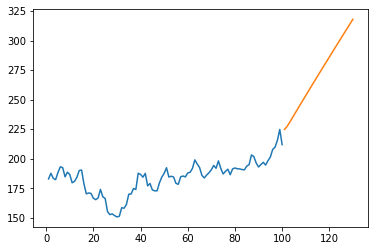

In [59]:
plt.plot(day_new,scaler.inverse_transform(df1[5041:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

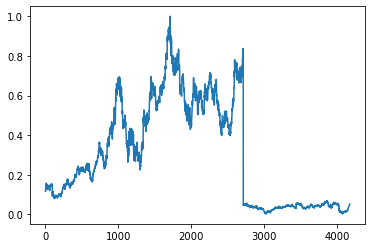

In [60]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1000:])

In [61]:
df3=scaler.inverse_transform(df3).tolist()

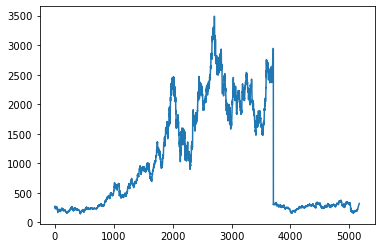

In [62]:
plt.plot(df3)